##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of unique classes: {num_classes}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of unique classes: 10


In [2]:
# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

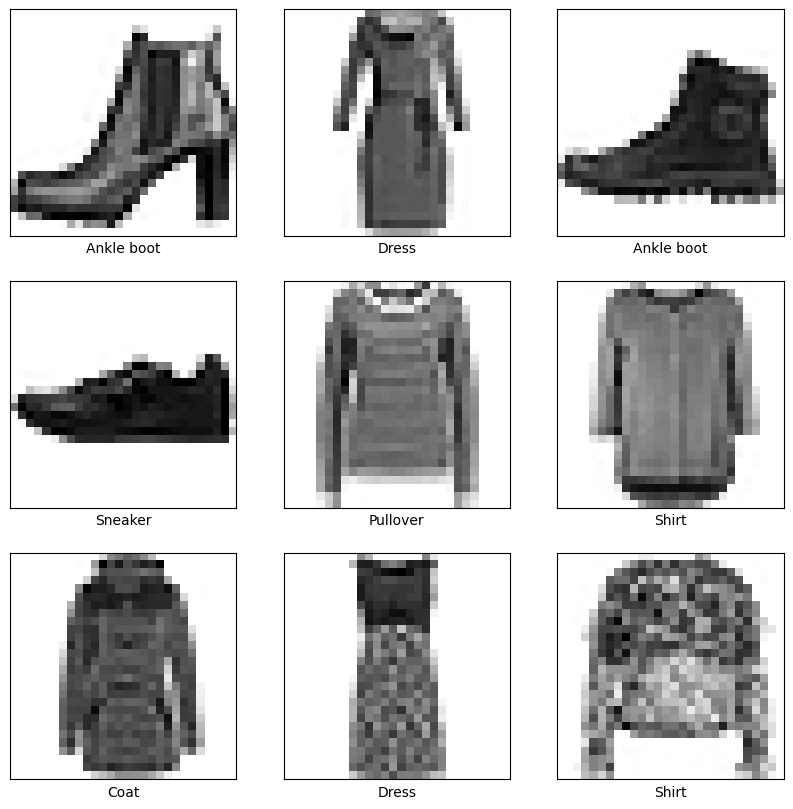

In [3]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Pick a random image
    idx = np.random.randint(0, len(x_train))
    plt.imshow(x_train[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[idx]])
plt.show()

Occurrences per class:
 {'T-shirt/top': np.int64(6000), 'Trouser': np.int64(6000), 'Pullover': np.int64(6000), 'Dress': np.int64(6000), 'Coat': np.int64(6000), 'Sandal': np.int64(6000), 'Shirt': np.int64(6000), 'Sneaker': np.int64(6000), 'Bag': np.int64(6000), 'Ankle boot': np.int64(6000)}


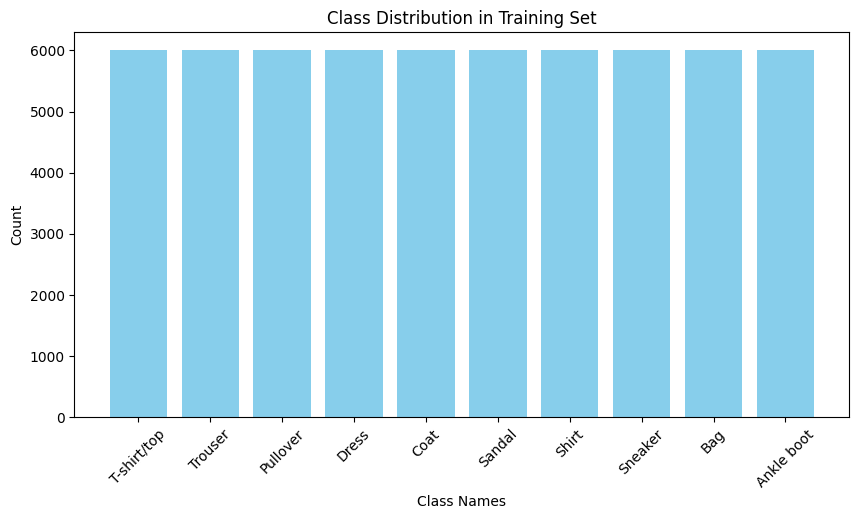

In [4]:
# Count occurrences of each class in the training set
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(class_names, counts))
print("Occurrences per class:\n", class_counts)

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts, color='skyblue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [5]:
# Normalize pixel values for x_train and x_test (Scale them between 0 and 1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNNs require a channel dimension. Grayscale images need to be reshaped from (28, 28) to (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build a CNN model
# standard architecture for 28x28 image classification
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10) # 10 output classes
])

# Compile the model
# Since we didn't apply a softmax activation in the last layer, we set from_logits=True
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
print("\nStarting Model Training...")
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'\nFinal Test Accuracy: {test_acc:.4f}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Starting Model Training...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7715 - loss: 0.6210 - val_accuracy: 0.8799 - val_loss: 0.3367
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8859 - loss: 0.3138 - val_accuracy: 0.8825 - val_loss: 0.3233
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9043 - loss: 0.2610 - val_accuracy: 0.8953 - val_loss: 0.2913
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9155 - loss: 0.2252 - val_accuracy: 0.9050 - val_loss: 0.2607
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9275 - loss: 0.1971 - val_accuracy: 0.9027 - val_loss: 0.2680
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9363 - loss: 0.1717 - val_accuracy: 0.9043 - val_loss: 0.2604
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9419 - loss: 0.1531 - val_accuracy: 0.9058 - val_loss: 0.2647
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accur